# Pivot Tables with Pandas - Lab

## Introduction

In this lab, we'll learn how to make use of our newfound knowledge of pivot tables to work with real-world data.  We'll start by exploring 

## Objectives

You will be able to:

* Understand and explain what a multi-level hierarchical index is
* Understand, explain the difference and use df.pivot and pd.pivot_table
* Switch between “long” and “wide” in a DataFrame using stack() and unstack()
* Transform “wide” to “long” DataFrames using `melt`

## Getting Started

### Import Pandas and Matplotlib.pyplot Using Standard Aliases

In the cell below:

* Import `pandas` and set the standard alias
* Import `matplotlib.pyplot` and set the standard alias
* Run the ipython magic command to display matplotlib graphs inline within the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab seperated values' instead of 'comma seperated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` method.

In [3]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [4]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

# Groupby Aggregations

Complete the following groupby statements.

# 1) Groupby State and Gender. Sum the values.

In [6]:
df.groupby(['State', 'Gender']).sum()

Notes  State Code   Deaths
State                Gender                            
Alabama              Female    0.0          40   430133
                     Male      0.0          41   430647
Alaska               Female    0.0          80    27199
                     Male      0.0          84    36135
Arizona              Female    0.0         180   396028
                     Male      0.0         188   442066
Arkansas             Female    0.0         195   258243
                     Male      0.0         210   264671
California           Female    0.0         282  2125965
                     Male      0.0         282  2181096
Colorado             Female    0.0         344   277787
                     Male      0.0         360   283496
Connecticut          Female    0.0         360   278653
                     Male      0.0         369   252637
Delaware             Female    0.0         340    68001
                     Male      0.0         350    67932
District of Columbia Female    0.0         352    46436
                     Male      0.0         363    47637
Florida              Female    0.0         528  1512891
                     Male      0.0         552  1618220
Georgia              Female    0.0         533   630265
                     Male      0.0         585   628752
Hawaii               Female    0.0         540    78586
                     Male      0.0         600    93658
Idaho                Female    0.0         544    97727
                     Male      0.0         608   102350
Illinois             Female    0.0         731   960785
                     Male      0.0         748   911386
Indiana              Female    0.0         702   523603
                     Male      0.0         738   508031
...                            ...         ...      ...
Oklahoma             Female    0.0        1760   327885
                     Male      0.0        1800   328650
Oregon               Female    0.0        1804   288677
                     Male      0.0        1804   287275
Pennsylvania         Female    0.0        1764  1199018
                     Male      0.0        1806  1114837
Rhode Island         Female    0.0        1496    93397
                     Male      0.0        1672    82869
South Carolina       Female    0.0        1710   360313
                     Male      0.0        1935   372258
South Dakota         Female    0.0        1518    63781
                     Male      0.0        1656    64818
Tennessee            Female    0.0        1880   533373
                     Male      0.0        1927   533354
Texas                Female    0.0        2112  1457648
                     Male      0.0        2208  1511566
Utah                 Female    0.0        2058   127955
                     Male      0.0        2156   132524
Vermont              Female    0.0        1150    48868
                     Male      0.0        1300    46432
Virginia             Female    0.0        2091   542518
                     Male      0.0        2244   528645
Washington           Female    0.0        2332   431062
                     Male      0.0        2385   434624
West Virginia        Female    0.0        1674   193664
                     Male      0.0        1674   192560
Wisconsin            Female    0.0        2420   436397
                     Male      0.0        2420   421232
Wyoming              Female    0.0        1792    37153
                     Male      0.0        1960    40233

[102 rows x 3 columns]

# 2) Groupby State and Gender and Race. Find the average values.

In [7]:
df.groupby(['State', 'Gender', 'Race']).mean()


Notes  State Code  \
State         Gender Race                                                  
Alabama       Female American Indian or Alaska Native    NaN         1.0   
                     Asian or Pacific Islander           NaN         1.0   
                     Black or African American           NaN         1.0   
                     White                               NaN         1.0   
              Male   American Indian or Alaska Native    NaN         1.0   
                     Asian or Pacific Islander           NaN         1.0   
                     Black or African American           NaN         1.0   
                     White                               NaN         1.0   
Alaska        Female American Indian or Alaska Native    NaN         2.0   
                     Asian or Pacific Islander           NaN         2.0   
                     Black or African American           NaN         2.0   
                     White                               NaN         2.0   
              Male   American Indian or Alaska Native    NaN         2.0   
                     Asian or Pacific Islander           NaN         2.0   
                     Black or African American           NaN         2.0   
                     White                               NaN         2.0   
Arizona       Female American Indian or Alaska Native    NaN         4.0   
                     Asian or Pacific Islander           NaN         4.0   
                     Black or African American           NaN         4.0   
                     White                               NaN         4.0   
              Male   American Indian or Alaska Native    NaN         4.0   
                     Asian or Pacific Islander           NaN         4.0   
                     Black or African American           NaN         4.0   
                     White                               NaN         4.0   
Arkansas      Female American Indian or Alaska Native    NaN         5.0   
                     Asian or Pacific Islander           NaN         5.0   
                     Black or African American           NaN         5.0   
                     White                               NaN         5.0   
              Male   American Indian or Alaska Native    NaN         5.0   
                     Asian or Pacific Islander           NaN         5.0   
...                                                      ...         ...   
Washington    Female Black or African American           NaN        53.0   
                     White                               NaN        53.0   
              Male   American Indian or Alaska Native    NaN        53.0   
                     Asian or Pacific Islander           NaN        53.0   
                     Black or African American           NaN        53.0   
                     White                               NaN        53.0   
West Virginia Female American Indian or Alaska Native    NaN        54.0   
                     Asian or Pacific Islander           NaN        54.0   
                     Black or African American           NaN        54.0   
                     White                               NaN        54.0   
              Male   American Indian or Alaska Native    NaN        54.0   
                     Asian or Pacific Islander           NaN        54.0   
                     Black or African American           NaN        54.0   
                     White                               NaN        54.0   
Wisconsin     Female American Indian or Alaska Native    NaN        55.0   
                     Asian or Pacific Islander           NaN        55.0   
                     Black or African American           NaN        55.0   
                     White                               NaN        55.0   
              Male   American Indian or Alaska Native    NaN        55.0   
                     Asian or Pacific Islander           NaN        55.0   
                     Black 

# 3) Groupby Gender and Race. Find the minimum values.

In [8]:
df.groupby(['Gender','Race']).min()


Notes    State  State Code  \
Gender Race                                                           
Female American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   
Male   American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   

                                        Ten-Year Age Groups  \
Gender Race                                                   
Female American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   
Male   American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   
       Asian or Pacific Islander                               1           M   
       Black or African American                               1           M   
       White                                                   1           M   

                                        Race Code  Deaths Population  \
Gender Race                                                            
Female American Indian or Alaska Native    1002-5      10     100285   
       Asian or Pacific Islander             A-PI      10     100371   
       Black or African American           2054-5      10     100170   
       White                               2106-3      12    1000704   
Male   American Indian or Alaska Native    1002-5      10       1001   
       Asian or Pacific Islander             A-PI      10    1000019   
       Black or African American           2054-5      10       1000   
       White                               2106-3      10    1005401   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0  
       Asian or Pacific Islander              10.0  
       Black or African American            1000.4  
       White                                  10.6

## 4) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

Text(0.5, 1.0, 'Number of Deaths by State')

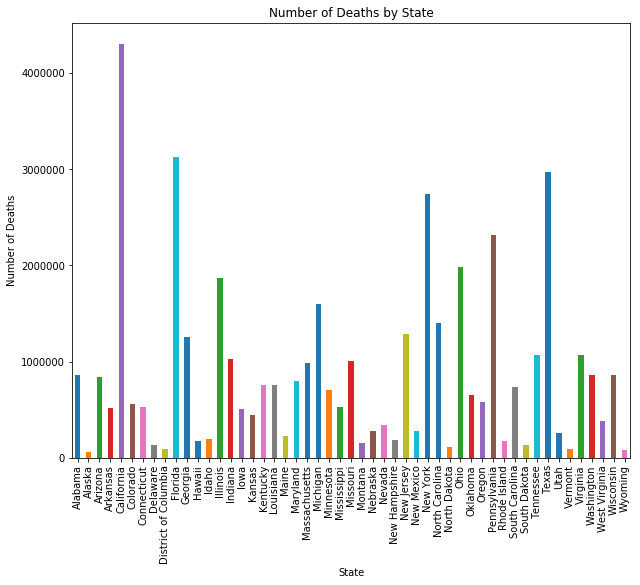

In [14]:
df.groupby(['State'])['Deaths'].sum().plot(kind='bar', figsize=(10,8))
#this groups by state, and only returns the sums of the deaths column. we pass that data into the plot method.

plt.ylabel('Number of Deaths')
plt.xlabel('State')
plt.title("Number of Deaths by State")

### Inspecting our Data

Let's go one step further and get a print-out of the data type of each column. 

In the cell below, get the `.info()` of our DataFrame, and note the data type that each column is currently stored as.  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


Let's look at some samples from the Population column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [19]:
df.Population.iloc[:5]

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

Just to be extra sure, let's check the value counts to see how many times each unqiue value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [21]:
df.Population.value_counts()[:5]
# we observe that there are 75 observations inputted as 'Not Applicable' strings

Not Applicable    75
2115               2
4258               2
3556               2
249                2
Name: Population, dtype: int64

Clearly, this data should be stored as a numeric type, not a categorical type.  

### 5a) Reformat the Population Column as an Integer
As stands, not all values will be able to be reformated as integers. Most of the cells in the the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `"Not Applicable"`.

We need to remove these rows before we can cast the Population column to an Integer data type. 

In the cell below:

* Slice the rows of `df` where the Population column is equal to `'Not Applicable'`.
* Use `to_drop.index`  to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`
* Cast the Population column to an integer data type using the `.astype()` function, with the single parameter `int64` passed in. 
* Print the Population column's `dtype` attribute to confirm it is now stored in `int64` format. 

**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [24]:
#find the rows where the popn column has strings 'Not applicable'
to_drop = df[df['Population']=='Not Applicable']

In [27]:
to_drop.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
80,NaN,Alabama,1,Not Stated,NS,Male,M,White,2106-3,13,Not Applicable,Not Applicable
251,NaN,Arizona,4,Not Stated,NS,Female,F,White,2106-3,99,Not Applicable,Not Applicable
252,NaN,Arizona,4,Not Stated,NS,Male,M,American Indian or Alaska Native,1002-5,23,Not Applicable,Not Applicable
253,NaN,Arizona,4,Not Stated,NS,Male,M,Black or African American,2054-5,12,Not Applicable,Not Applicable
254,NaN,Arizona,4,Not Stated,NS,Male,M,White,2106-3,438,Not Applicable,Not Applicable


In [28]:
df.drop(to_drop.index, axis=0, inplace=True)
#this drops the index rows of to_drop, which we have defined as the rows with population='Not Applicable'
# inplace=True means it will be true for all cells in the notebook
df.Population = df.Population.astype('int64')
#this line then changes the remaining population observations' datatype to integers
print(df.Population.dtype)
#we check whether the datatype has changed

int64


### 5b) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the of the Mean Population by State.

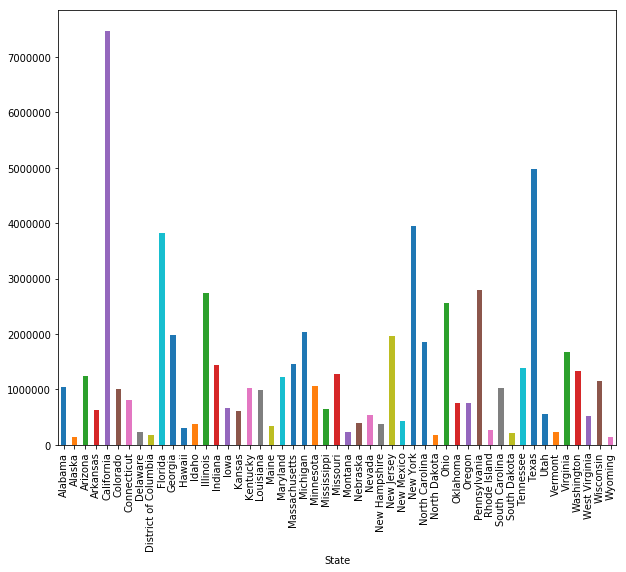

In [33]:
#Your code here
df.groupby(["State"])["Population"].mean().plot(kind='bar', figsize=(10,8))

Below we will investigate how we can combine the **pivot** method along with the **groupby** method to combine some cool **stacked bar charts**!

### Using Aggregate Functions

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Death'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the head of this of this new DataFrame.

In [46]:
# A sample groupby similar to above. 
grouped = df.groupby(['State', 'Gender'])['Deaths', 'Population'].agg(['mean', 'min', 'max', 'std'])
grouped.head()

Deaths                              Population         \
                        mean min     max           std          mean    min   
State   Gender                                                                
Alabama Female  10753.325000  10  116297  24612.250487  1.078713e+06   2087   
        Male    10765.850000  10   88930  20813.538537  1.014946e+06   1129   
Alaska  Female    679.975000  13    4727   1154.870455  1.440403e+05   1224   
        Male      860.357143  12    5185   1411.777392  1.518884e+05    578   
Arizona Female   8998.386364  21  133923  26245.941003  1.246502e+06  12211   

                                       
                    max           std  
State   Gender                         
Alabama Female  4334752  1.400309e+06  
        Male    4284775  1.397830e+06  
Alaska  Female   682855  2.015793e+05  
        Male     770502  2.238843e+05  
Arizona Female  6265346  2.096632e+06

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [47]:
grouped.index

MultiIndex(levels=[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Female', 'Male']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `reset_index()` function.  Then, display the head of the DataFrame.  

In [ ]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather then the index.
grouped = None

Note how the way the index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [48]:
grouped.reset_index()

State  Gender        Deaths                             \
                                           mean min     max            std   
0                 Alabama  Female  10753.325000  10  116297   24612.250487   
1                 Alabama    Male  10765.850000  10   88930   20813.538537   
2                  Alaska  Female    679.975000  13    4727    1154.870455   
3                  Alaska    Male    860.357143  12    5185    1411.777392   
4                 Arizona  Female   8998.386364  21  133923   26245.941003   
5                 Arizona    Male  10036.204545  28  110347   24736.056309   
6                Arkansas  Female   6621.615385  11   81126   16794.044835   
7                Arkansas    Male   6301.690476  10   61671   14165.374833   
8              California  Female  48312.840909  37  720306  132121.217672   
9              California    Male  49555.522727  42  473226  108799.190468   
10               Colorado  Female   6460.162791  11  102790   19302.972849   
11               Colorado    Male   6442.500000  11   67020   15771.618909   
12            Connecticut  Female   7144.641026  12  123075   22486.493850   
13            Connecticut    Male   6315.300000  11   65879   15808.791538   
14               Delaware  Female   2000.029412  11   21627    4641.612706   
15               Delaware    Male   1940.914286  13   15976    3808.261525   
16   District of Columbia  Female   1497.580645  11   10428    2679.916190   
17   District of Columbia    Male   1534.806452  10    7066    2265.979588   
18                Florida  Female  36019.071429  19  550300  104255.285830   
19                Florida    Male  36771.340909  10  411612   91930.916198   
20                Georgia  Female  15372.317073  20  162447   33653.636538   
21                Georgia    Male  14621.069767  12  116794   27570.074438   
22                 Hawaii  Female   2182.944444  10   23476    4781.899001   
23                 Hawaii    Male   2341.450000  11   18791    4436.617804   
24                  Idaho  Female   2874.323529  11   38088    7990.822485   
25                  Idaho    Male   2693.421053  15   27053    6665.940386   
26               Illinois  Female  23432.926829  13  348960   64838.079239   
27               Illinois    Male  21698.000000  15  210711   47947.187466   
28                Indiana  Female  13425.717949  11  185795   37468.783350   
29                Indiana    Male  12700.275000  12  126266   29618.163156   
..                    ...     ...           ...  ..     ...            ...   
72               Oklahoma  Female   7451.931818  11  103703   20397.710505   
73               Oklahoma    Male   7468.909091  14   76790   17197.152298   
74                 Oregon  Female   6560.840909  10  115055   21138.542646   
75                 Oregon    Male   6528.977273  13   74395   17478.932830   
76           Pennsylvania  Female  29972.575000  10  473687   89923.668919   
77           Pennsylvania    Male  27187.463415  20  297094   66807.101332   
78           Rhode Island  Female   2746.970588  10   42473    8334.872239   
79           Rhode Island    Male   2239.243243  11   22680    5553.951543   
80         South Carolina  Female   9737.891892  25   93345   20390.325422   
81         South Carolina    Male   9078.292683  12   72346   17092.434648   
82           South Dakota  Female   1932.757576  14   28814    5607.382037   
83           South Dakota    Male   1800.500000  10   17216    4260.226617   
84              Tennessee  Female  13334.325000  13  161305   33524.701804   
85              Tennessee    Male  13333.050000  15  118394   28337.345393   
86                  Texas  Female  33897.953488  11  451158   89297.056719   
87                  Texas    Male  34347.636364  11  332525   76342.901372   
88                   Utah  Female   3046.547619  10   47195    9077.541206   
89                   Utah    Male   3081.511628  11   32732    7601.148248   
90                Vermont  Female   2124.6

However, look again at the displayed DataFrame--specifically, the columns.  Resetting the index has caused the DataFrame to use a mutlti-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [49]:
#Notice that this causes columns to be MultiIndexed!
grouped.columns

MultiIndex(levels=[['Deaths', 'Population'], ['mean', 'min', 'max', 'std']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]])

#### Column Levels

Since we're working with miulti-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `get_level_values` method contained within the DataFrame's `columns` object to get the values for the outermost layer of the index. 

In [51]:
grouped.columns.get_level_values(0)

Index(['Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population', 'Population',
       'Population', 'Population'],
      dtype='object')

Now, get the level values for the inner layer of the index. 

In [52]:
grouped.columns.get_level_values(1)

Index(['mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std'], dtype='object')

### Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it--but take some time to examine the code in the cell below and see if you can understand how it works! 

In [61]:
#We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
#The list comprehension above is more complicated then what we need but creates a nicer formatting and
#demonstrates using a conditional within a list comprehension.
#This simpler version works but has some tail underscores where col1 is blank:
#grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

IndexError: Too many levels: Index has only 1 level, not 2

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the head of the `grouped` DataFrame. 

In [62]:
grouped.head()

Deaths_mean  Deaths_min  Deaths_max    Deaths_std  \
State   Gender                                                       
Alabama Female  10753.325000          10      116297  24612.250487   
        Male    10765.850000          10       88930  20813.538537   
Alaska  Female    679.975000          13        4727   1154.870455   
        Male      860.357143          12        5185   1411.777392   
Arizona Female   8998.386364          21      133923  26245.941003   

                Population_mean  Population_min  Population_max  \
State   Gender                                                    
Alabama Female     1.078713e+06            2087         4334752   
        Male       1.014946e+06            1129         4284775   
Alaska  Female     1.440403e+05            1224          682855   
        Male       1.518884e+05             578          770502   
Arizona Female     1.246502e+06           12211         6265346   

                Population_std  
State   Gender                  
Alabama Female    1.400309e+06  
        Male      1.397830e+06  
Alaska  Female    2.015793e+05  
        Male      2.238843e+05  
Arizona Female    2.096632e+06

## Using Pivots

Now, we'll gain some practice using the DataFrame class's built-in `.pivot()` method.  

In the cell below, call the DataFrame's pivot method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the head of our new `pivot` DataFrame to see what it looks like. 

In [63]:
# Now it's time to pivot!
pivot = grouped.pivot(index='State', columns= 'Gender', values='Deaths_mean')
pivot.head()

KeyError: 'State'

Great! We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the head of the object to see if we can detect any changes.

In [65]:
# Again, notice the subtle difference of reseting the index:
pivot = grouped.reset_index()
pivot.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087,4334752,1.400309e+06
1,Alabama,Male,10765.850000,10,88930,20813.538537,1.014946e+06,1129,4284775,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224,682855,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578,770502,2.238843e+05
4,Arizona,Female,8998.386364,21,133923,26245.941003,1.246502e+06,12211,6265346,2.096632e+06


### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

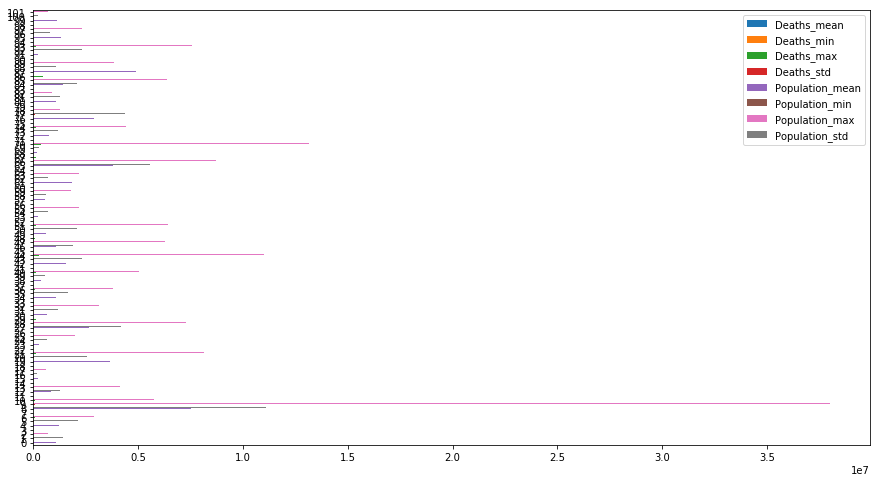

In [66]:
# Now let's make a sweet bar chart!!
pivot.plot(kind='barh', figsize=(15,8))

Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods--do not rebind `pivot` to be equal to this line of code. 

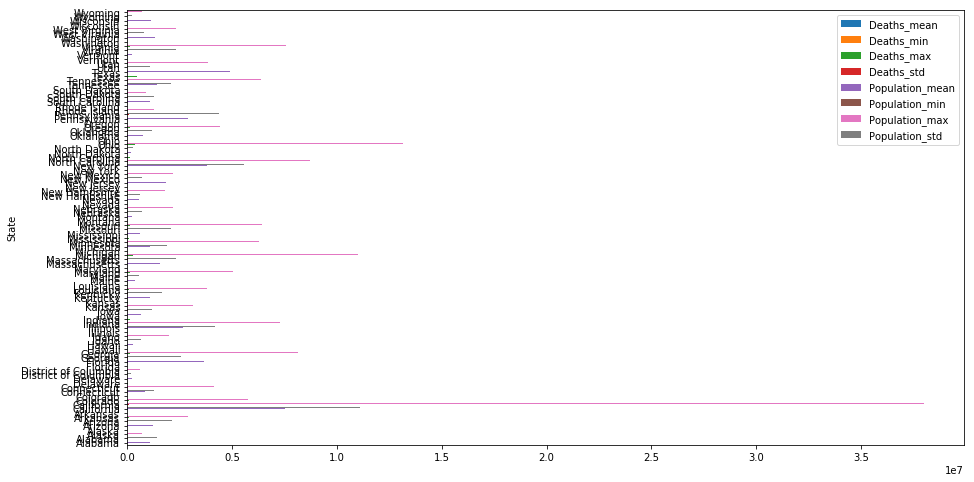

In [67]:
#Where's the states?! Notice the y-axis is just a list of numbers.
#This is populated by the DataFrame's index.
#When we used the .reset_index() method, we created a new numbered index to name each row. 
#Let's fix that by making state the index again.
pivot.set_index('State').plot(kind='barh', figsize=(15,8))

Now, that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [68]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
#The above method returned a DataFrame with State as index and we plotted it,
#but it did not update the DataFrame itself.
pivot.head()

,State,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
0,Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087,4334752,1.400309e+06
1,Alabama,Male,10765.850000,10,88930,20813.538537,1.014946e+06,1129,4284775,1.397830e+06
2,Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224,682855,2.015793e+05
3,Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578,770502,2.238843e+05
4,Arizona,Female,8998.386364,21,133923,26245.941003,1.246502e+06,12211,6265346,2.096632e+06


Note that the index has not changed.  That's because the code we wrote when we set the index to the 'State' column returns a copy of the DataFrame object with the index set to 'State'--by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

In [69]:
#If we wanted to more permanently change the index we would set it first and then plot:
pivot = pivot.set_index('State')

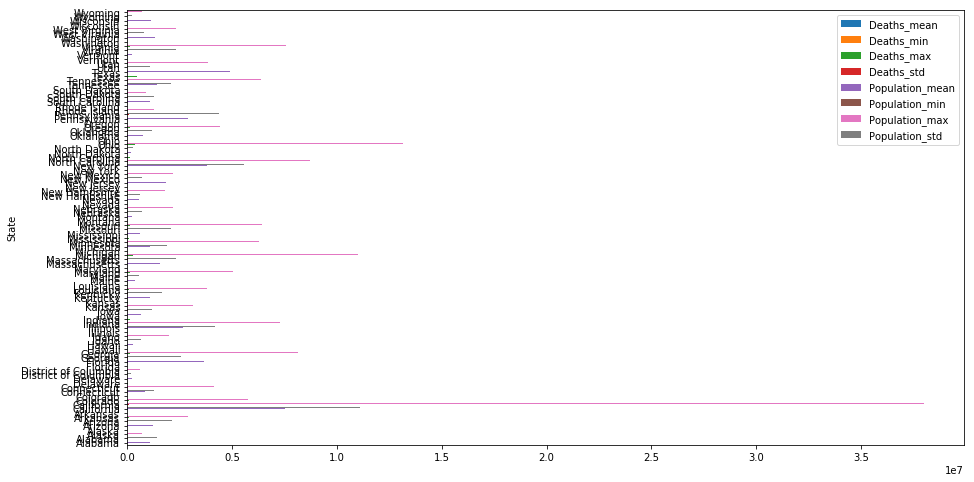

In [70]:
pivot.plot(kind='barh', figsize=(15,8))

Again, let's check the head of the DataFrame to confirm that the index structure has changed.  

In [71]:
pivot.head()

,Gender,Deaths_mean,Deaths_min,Deaths_max,Deaths_std,Population_mean,Population_min,Population_max,Population_std
State,,,,,,,,,
Alabama,Female,10753.325000,10,116297,24612.250487,1.078713e+06,2087,4334752,1.400309e+06
Alabama,Male,10765.850000,10,88930,20813.538537,1.014946e+06,1129,4284775,1.397830e+06
Alaska,Female,679.975000,13,4727,1154.870455,1.440403e+05,1224,682855,2.015793e+05
Alaska,Male,860.357143,12,5185,1411.777392,1.518884e+05,578,770502,2.238843e+05
Arizona,Female,8998.386364,21,133923,26245.941003,1.246502e+06,12211,6265346,2.096632e+06


Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

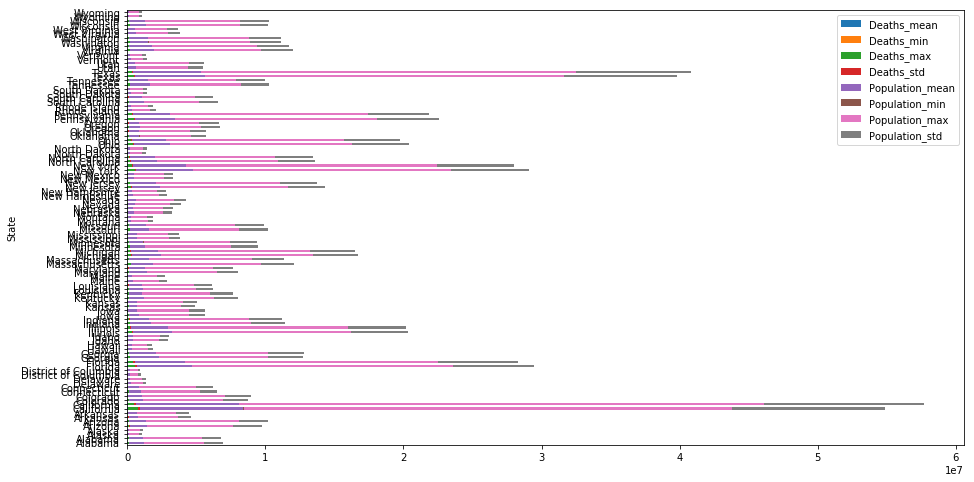

In [72]:
# Lastly, let's stack each of these bars for each state.
#Notice we don't have to worry about index here, because we've already set it above.
pivot.plot(kind='barh', figsize=(15,8), stacked=True)

## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

In [73]:
grouped.head()

Deaths_mean  Deaths_min  Deaths_max    Deaths_std  \
State   Gender                                                       
Alabama Female  10753.325000          10      116297  24612.250487   
        Male    10765.850000          10       88930  20813.538537   
Alaska  Female    679.975000          13        4727   1154.870455   
        Male      860.357143          12        5185   1411.777392   
Arizona Female   8998.386364          21      133923  26245.941003   

                Population_mean  Population_min  Population_max  \
State   Gender                                                    
Alabama Female     1.078713e+06            2087         4334752   
        Male       1.014946e+06            1129         4284775   
Alaska  Female     1.440403e+05            1224          682855   
        Male       1.518884e+05             578          770502   
Arizona Female     1.246502e+06           12211         6265346   

                Population_std  
State   Gender                  
Alabama Female    1.400309e+06  
        Male      1.397830e+06  
Alaska  Female    2.015793e+05  
        Male      2.238843e+05  
Arizona Female    2.096632e+06

As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

In [74]:
grouped.stack()

State      Gender                 
Alabama    Female  Deaths_mean        1.075333e+04
                   Deaths_min         1.000000e+01
                   Deaths_max         1.162970e+05
                   Deaths_std         2.461225e+04
                   Population_mean    1.078713e+06
                   Population_min     2.087000e+03
                   Population_max     4.334752e+06
                   Population_std     1.400309e+06
           Male    Deaths_mean        1.076585e+04
                   Deaths_min         1.000000e+01
                   Deaths_max         8.893000e+04
                   Deaths_std         2.081354e+04
                   Population_mean    1.014946e+06
                   Population_min     1.129000e+03
                   Population_max     4.284775e+06
                   Population_std     1.397830e+06
Alaska     Female  Deaths_mean        6.799750e+02
                   Deaths_min         1.300000e+01
                   Deaths_max         4.727000e

As we can see, the `stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index! This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [78]:
pivot = pivot.unstack()
pivot

ValueError: Index contains duplicate entries, cannot reshape

Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results!

In the cell below, set pivot equal to `pivot.unstack()` again, and then display the `pivot` object to see how things have changed.

In [79]:
pivot = pivot.unstack()
pivot

ValueError: Index contains duplicate entries, cannot reshape

After calling unstack a second time, we can see that `pivot` has a flattened structure, since it has been completely unstacked!

## Summary

In this lab, we learned how to:

* Use `groupby` to stack and slice data conditionally
* Use aggregate functions in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 